# Library dan gambar

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("mobil.jpeg")
(baris, kolom) = img.shape[:2]
img.shape #untuk mengetahui dimensi gambar (p x l x t)

(1165, 1600, 3)

# citra kontas

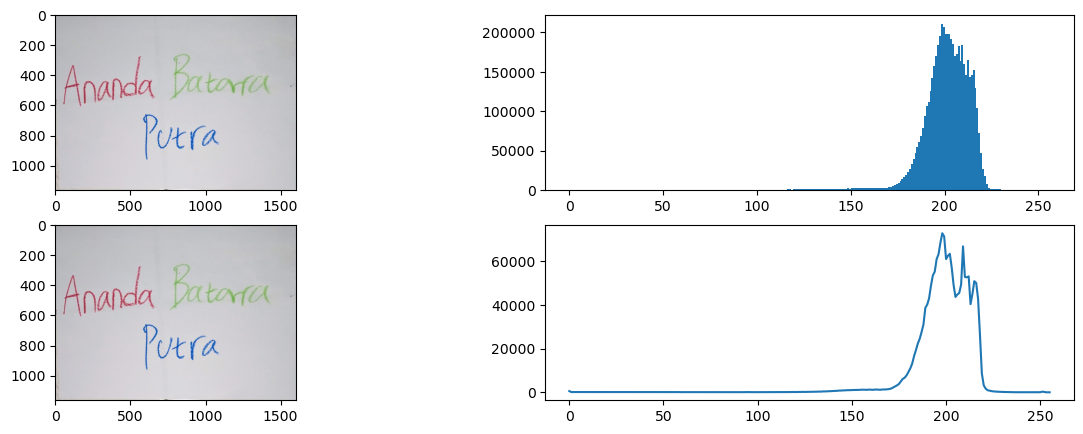

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(),256,[0,256])
hist = cv2.calcHist([img],[0],None,[256],[0,256])
axs[1,0].imshow(img)
axs[1,1].plot(hist)
plt.show()

# menaikkan kontras citra

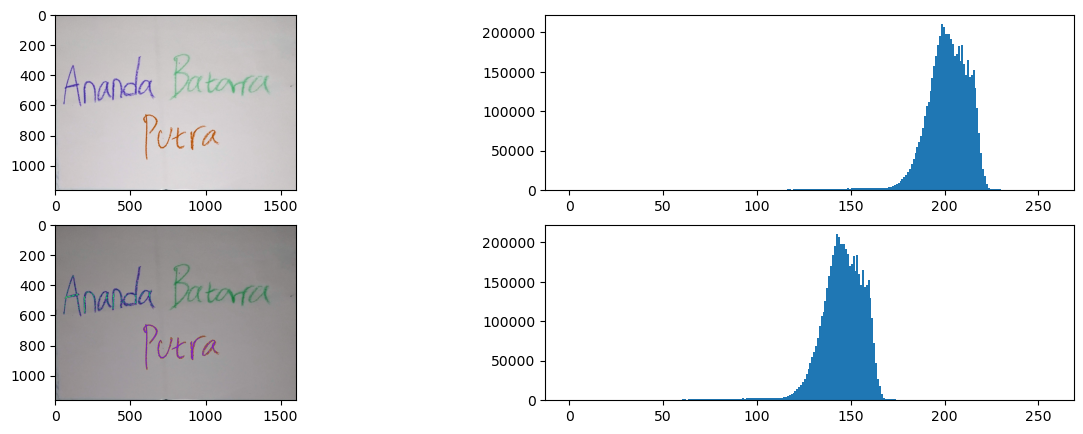

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#upgrade kontras
beta = 200                                 
citra_cerah = np.zeros((baris, kolom, 3))

for x in range(baris) :
    for y in range(kolom) :
        gyx = img[x,y] + beta
        citra_cerah[x,y] = gyx
        
citra_cerah = citra_cerah.astype(np.uint8)

fig, axs = plt.subplots(2,2, figsize = (15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(),256,[0,256])
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_cerah.ravel(),256,[0,256])
plt.show()

# deteksi merah


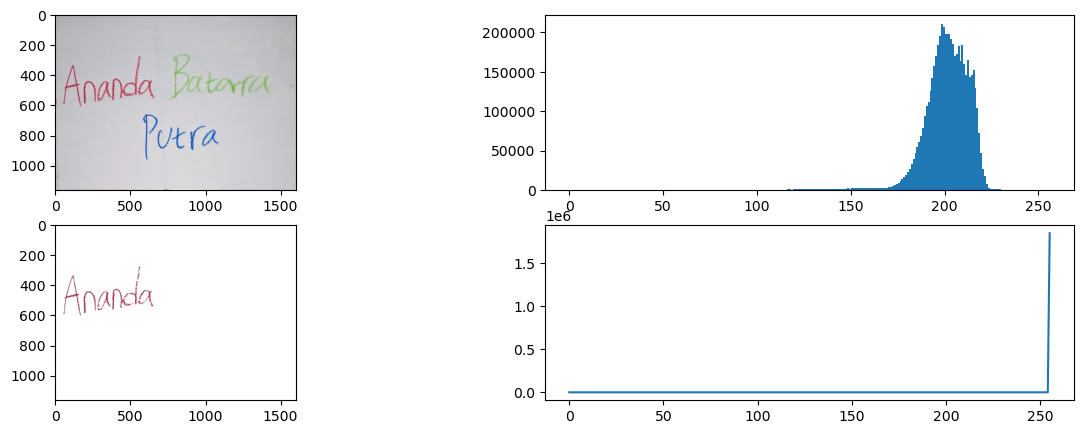

In [5]:
# ambil gambar
image = cv2.imread('mobil.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Konversi HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# rentang warna merah  HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

# mask merah
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# mask kecuali merah
mask_not_red = cv2.bitwise_not(mask_red)

# Mutihkan semua warna kecuali merah pada gambar asli
whitened_image = cv2.bitwise_and(image, image, mask=mask_not_red)
    
# Hitamkan area yang terdeteksi
whitened_image = image.copy()
whitened_image[(mask_not_red != 0)]= [255, 255, 255]    #agar selain warna hijau dipudarkan
# Tampilkan gambar dan histogramnya
fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(image)
axs[0,1].hist(image.ravel(),256,[0,256])
hist = cv2.calcHist([whitened_image],[0],None,[256],[0,256])
axs[1,0].imshow(whitened_image)
axs[1,1].plot(hist)
plt.show()

# deteksi hijau

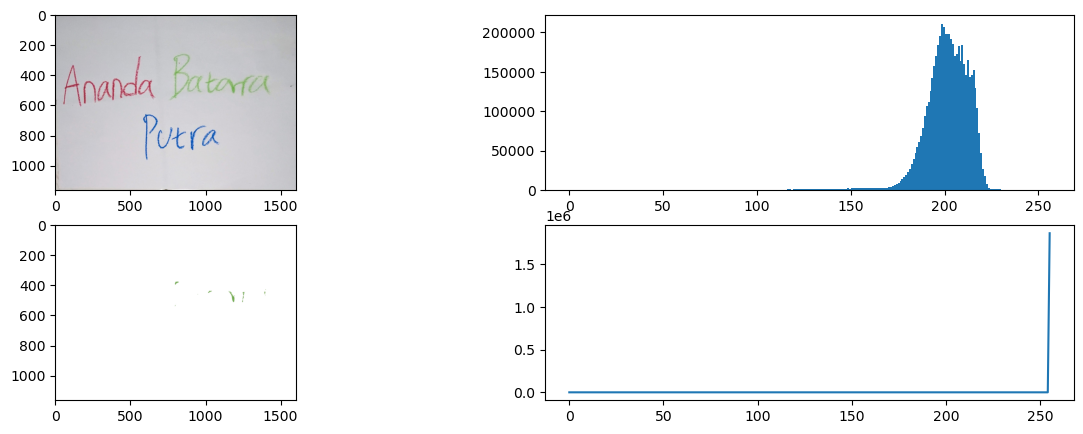

In [6]:
# ambil gambar
image = cv2.imread('mobil.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Konversi HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# rentang warna hijau HSV
lower_green = np.array([35, 100, 100])
upper_green = np.array([90, 255, 255])

# mask hijau
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# mask kecuali hijau
mask_not_green = cv2.bitwise_not(mask_green)

# Mutihkan semua warna kecuali hijau
whitened_image = cv2.bitwise_and(image, image, mask=mask_not_green)
    
# Hitamkan area yang terdeteksi
whitened_image = image.copy()
whitened_image[(mask_not_green != 0)]= [255, 255, 255]       #agar selain warna hijau dipudarkan

# Tampilkan gambar dan histogramnya
fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(image)
axs[0,1].hist(image.ravel(),256,[0,256])
hist = cv2.calcHist([whitened_image],[0],None,[256],[0,256])
axs[1,0].imshow(whitened_image)
axs[1,1].plot(hist)
plt.show()

# deteksi biru

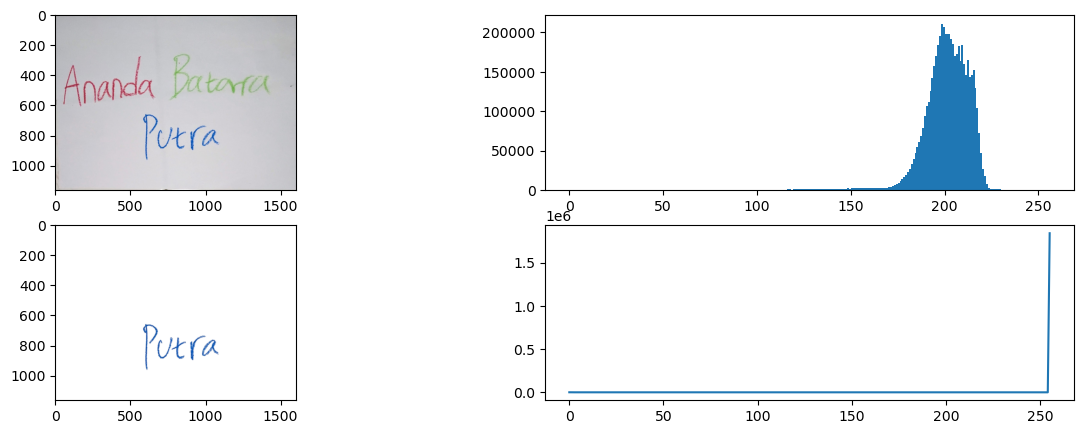

In [7]:
# ambil gambar
image = cv2.imread('mobil.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Konversi HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# rentang warna biru HSV
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# mask biru
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# mask kecuali biru
mask_not_blue = cv2.bitwise_not(mask_blue)

# Mutihkan semua warna kecuali biru
whitened_image = cv2.bitwise_and(image, image, mask=mask_not_blue)
    
# Hitamkan area yang terdeteksi
whitened_image = image.copy()
whitened_image[(mask_not_blue != 0)]= [255, 255, 255]       #agar selain warna hijau dipudarkan

# Tampilkan gambar dan histogramnya
fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(image)
axs[0,1].hist(image.ravel(),256,[0,256])
hist = cv2.calcHist([whitened_image],[0],None,[256],[0,256])
axs[1,0].imshow(whitened_image)
axs[1,1].plot(hist)
plt.show()


# ambang batas biru


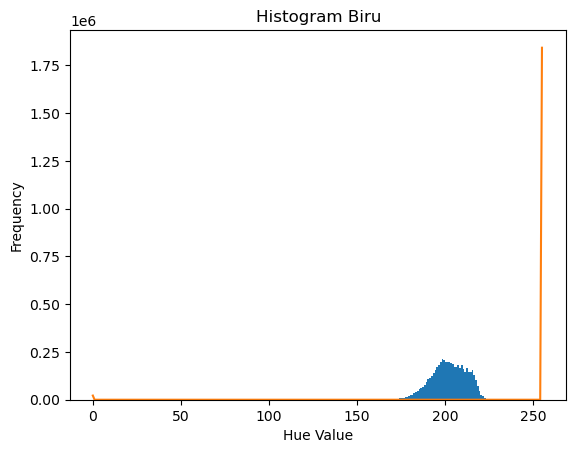

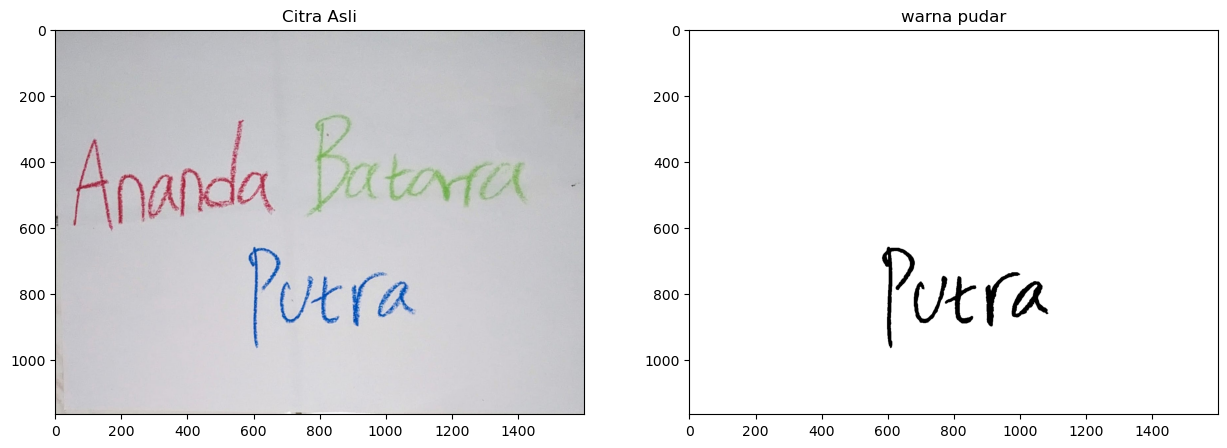

Ambang batas biru: 114


In [8]:
# Fungsi ambang batas biru
def find_blue_threshold (image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])
    blue_threshold  = np.argmax(hist)
    return blue_threshold 

# ambil gambar
image = cv2.imread('mobil.jpeg')

# nilai ambang bata biru
blue_threshold = find_blue_threshold(image)

# rentang warna biru HSV
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# mask biru
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# mask kecuali biru
mask_not_blue = cv2.bitwise_not(mask_blue)

# Hitamkan area yang terdeteksi
whitened_image = cv2.bitwise_and(image, image, mask=mask_not_blue)
whitened_image[mask_not_blue != 0] = [255, 255, 255]

# Tampilkan histogramnya
plt.hist(image.ravel(),256,[0,256])
hist = cv2.calcHist([whitened_image],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlabel('Hue Value')
plt.ylabel('Frequency')
plt.title('Histogram Biru')
plt.show()

# Tampilkan gambar dan perbandingannya
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')
axs[1].imshow(cv2.cvtColor(whitened_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('warna pudar')
plt.show()
print("Ambang batas biru:", blue_threshold)


# ambang batas merah

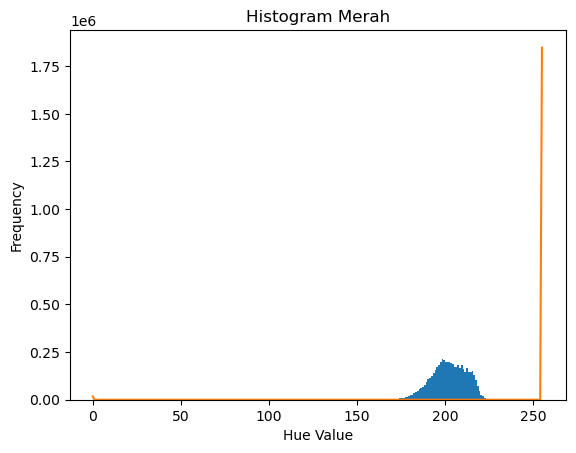

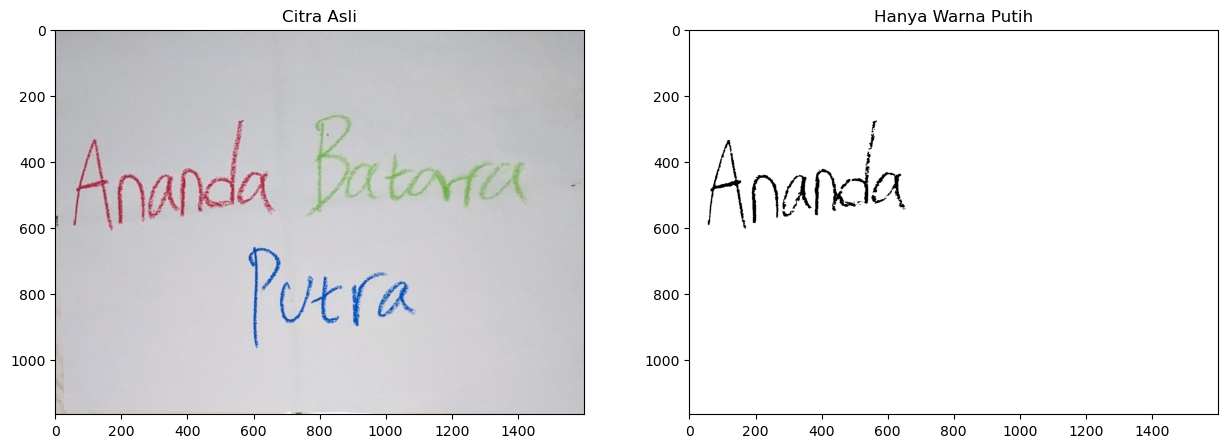

Ambang batas merah: 114


In [9]:
# ambil gambar
image = cv2.imread('mobil.jpeg')

# Fungsi ambang batas merah
def find_red_threshold(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])
    red_threshold  = np.argmax(hist)
    return red_threshold

# nilai ambang bata merah
red_threshold = find_red_threshold(image)

# Konversi HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# rentang warna merah HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

# mask merah
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# mask kecuali merah
mask_not_red = cv2.bitwise_not(mask_red)

# mutihkan area yang terdeteksi kecuali merah
whitened_image = cv2.bitwise_and(image, image, mask=mask_not_red)
whitened_image[mask_not_red != 0] = [255, 255, 255]

# Tampilkan histogram
plt.hist(image.ravel(),256,[0,256])
hist = cv2.calcHist([whitened_image],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlabel('Hue Value')
plt.ylabel('Frequency')
plt.title('Histogram Merah')
plt.show()

# Tampilkan gambar dan perbandingannya
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')
axs[1].imshow(cv2.cvtColor(whitened_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Hanya Warna Putih')
plt.show()
print("Ambang batas merah:", red_threshold )


# ambang batas hijau

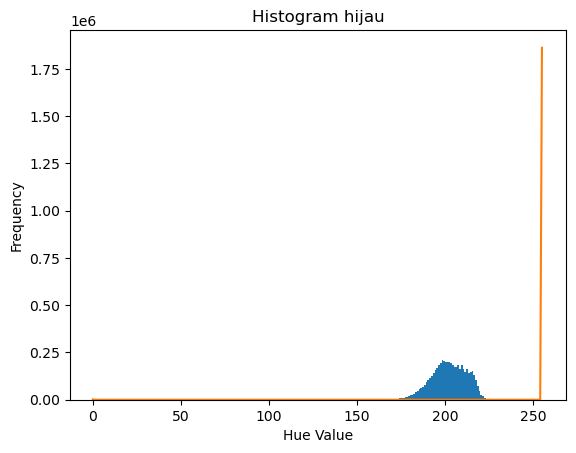

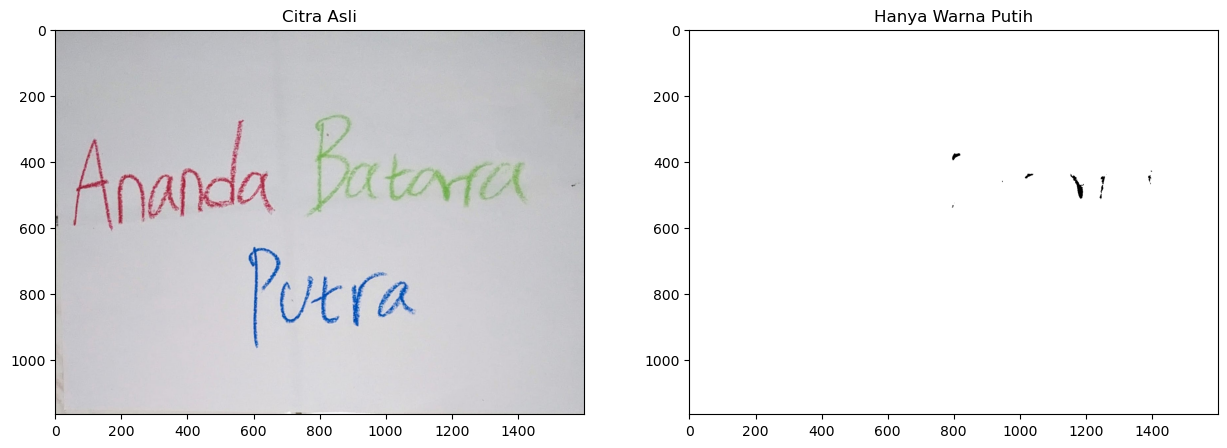

Ambang batas hijau: 114


In [10]:
# Fungsi ambang batas hijau
def find_green_threshold(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])
    green_threshold = np.argmax(hist)
    return green_threshold

# ambil gambar
image = cv2.imread('mobil.jpeg')

# nilai ambang bata hijau
green_threshold = find_green_threshold(image)

# Konversi HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# rentang warna hijau HSV
lower_green = np.array([35, 100, 100])
upper_green = np.array([90, 255, 255])

# mask hijau
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# mask kecuali hijau
mask_not_green = cv2.bitwise_not(mask_green)

# mutihkan area yang terdeteksi
whitened_image = cv2.bitwise_and(image, image, mask=mask_not_green)
whitened_image[mask_not_green != 0] = [255, 255, 255]

# Tampilkan histogram
plt.hist(image.ravel(),256,[0,256])
hist = cv2.calcHist([whitened_image],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlabel('Hue Value')
plt.ylabel('Frequency')
plt.title('Histogram hijau')
plt.show()

# Tampilkan gambar dan perbandingannya
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')
axs[1].imshow(cv2.cvtColor(whitened_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Hanya Warna Putih')
plt.show()
print("Ambang batas hijau:", green_threshold)
